# Fit any model
This week we are going to use a non-linear curve fit.  Python can not know every possible model, so we will have to supply the model to python.  We do that using a function, then we pass this function to the curve fitter which will attempt to minimize the difference between the data and the model (i.e. the data and the data returned from the function).

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [73]:
# First let us load in our data and look at it.
data = np.genfromtxt('Data/Lorentz.csv', delimiter=',')

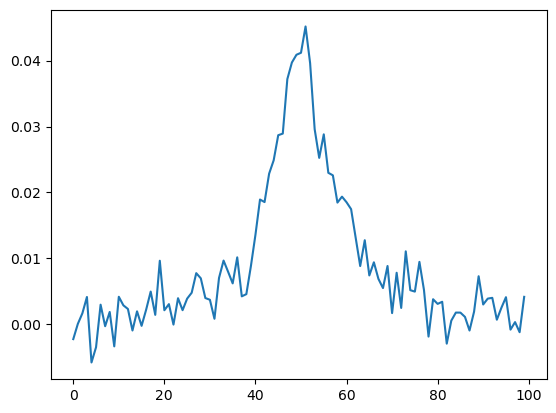

In [74]:
# Lets have a look at it
plt.plot(data[:,0], data[:,1])

# The function
The data we have just loaded is generated from a magnetic resonance experiment. It is common to fit the magnetic data usign a Lorentz distribution (Cauchy distribution).
$ f(x_o,\gamma) = \frac{1}{\pi} \bigg[\frac{\gamma}{(x-x_o)^2+\gamma^2}\bigg]$

In [59]:
#The function is given below.
def Lorentz(xdata, xo, gamma):
    front = 1/np.pi
    back = gamma/((xdata-xo)**2 + gamma**2)
    return front * back

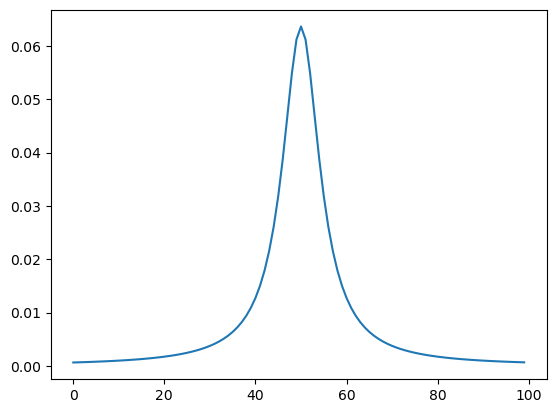

In [60]:
xdata = np.linspace(0,99,100)
ydata = Lorentz(xdata, 50, 5)
plt.plot(xdata, ydata)

# Fitting
Fitting the data to a model is really easy.
We use the curve_fit function in scipy, the function in its simplest form takes three arguments.
1.) The model (a function),
2.) the xdata,
3.) the ydata.

In [61]:
# Here is the function call.
popt, pcov = curve_fit(Lorentz, data[:,0], data[:,1])

The function return two arrays, popt and pcov.
Popt will have a length equal to the number of parameters in the function used as the fitting model. We will come back to pcov later.

In [62]:
print("The fitted parameters are ")
for param in popt:
    print(param)

The fitted parameters are 
50.078971820777994
7.791566812120126


# Using the fitted parameters to fit the model.
Now that we have the fitted parameters we can use them to create a fit line for our data.  We can use the model (the function) with the fitted parameters.

In [63]:
fittedData = Lorentz(data[:,0], *popt)

Text(0, 0.5, 'dt/t')

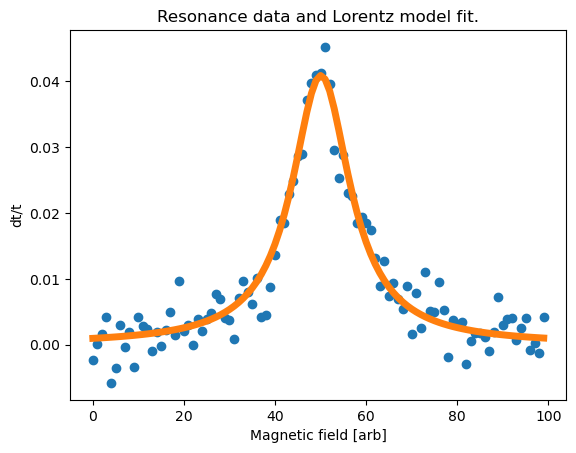

In [64]:
plt.plot(data[:,0], data[:,1],'o')
plt.plot(data[:,0], fittedData,linewidth=5)
plt.title('Resonance data and Lorentz model fit.')
plt.xlabel('Magnetic field [arb]')
plt.ylabel('dt/t')

In [65]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[0.22817848 0.22849552]


# But what if it will not fit.
Well there is a neat little trick you can try you can supply you initial guesses.
Lets make the data a little more noisy


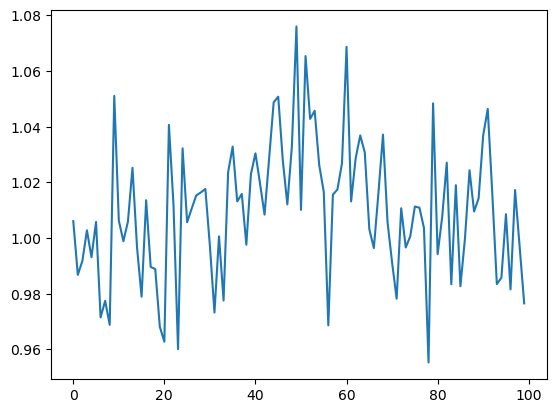

In [69]:
noisydata = data[:,1] + np.random.normal(1,0.02, 100)
plt.plot(data[:,0], noisydata)

In [70]:
popt, pcov = curve_fit(Lorentz, data[:,0], noisydata)
print(popt)

[13.1133627   1.63081844]


In [71]:
myGuesses =np.asarray([50,8])
popt, pcov = curve_fit(Lorentz, data[:,0], noisydata, p0=myGuesses)
print(popt)

[49.91189437  2.21919087]
